In [21]:
import os 
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [22]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

df = pd.read_pickle('../../../data/processed/state2/android_df.pkl')
print(df.shape)

(561, 18)


In [23]:
df.columns

Index(['eventType', 'eventSampleSpeed', 'eventDurationSeconds',
       'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed',
       'eventMilesDriven', 'memsMedianLateralAccel', 'memsP75LateralAccel',
       'memsP95LateralAccel', 'gyro_angular_change_per_second',
       'gyroAngleChange', 'mems_radius', 'aggressive', 'dv', 'turn_intensity',
       'angle_norm', 'radius_log'],
      dtype='object')

In [24]:
df = df[(df['eventType'] == 4)]

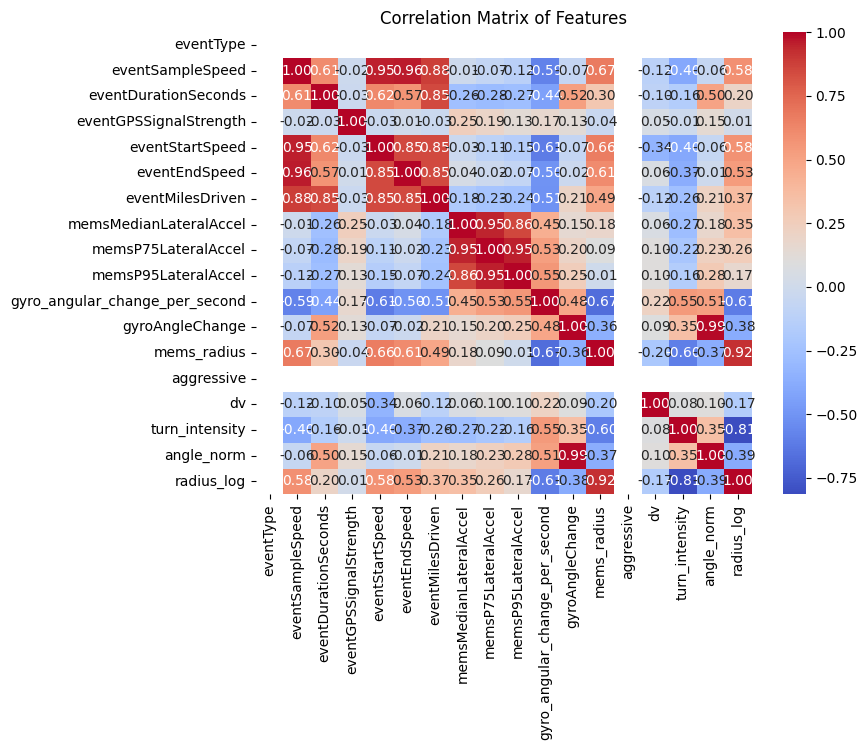

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [26]:
df = df.drop(columns=['eventType', 'eventGPSSignalStrength', 'memsP75LateralAccel', 'memsP95LateralAccel', 'aggressive'])
df = df.dropna(subset=['gyroAngleChange'])
corr_matrix = df.corr()

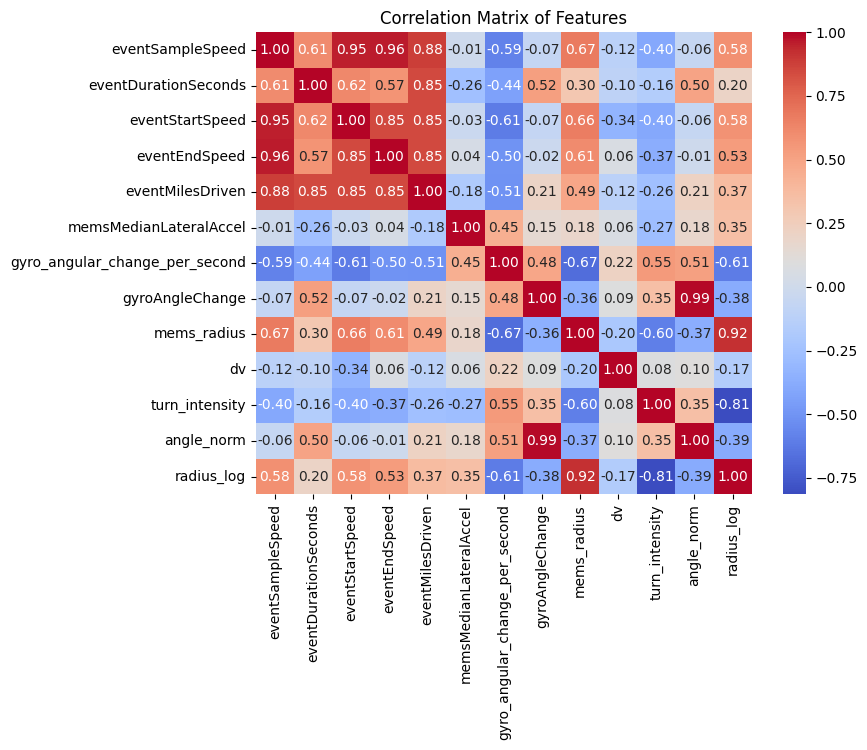

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [28]:
df.columns

Index(['eventSampleSpeed', 'eventDurationSeconds', 'eventStartSpeed',
       'eventEndSpeed', 'eventMilesDriven', 'memsMedianLateralAccel',
       'gyro_angular_change_per_second', 'gyroAngleChange', 'mems_radius',
       'dv', 'turn_intensity', 'angle_norm', 'radius_log'],
      dtype='object')

In [29]:
# Save new_df to file to later load
df.to_pickle(root / "data" / "processed" / "state2" / 'left_android_df.pkl')

In [30]:
df.shape

(249, 13)